In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
data = pd.read_csv("C:\\Users\\HP\\Documents\\MeriSKILL Internship\\diabetes.csv")

In [13]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: >

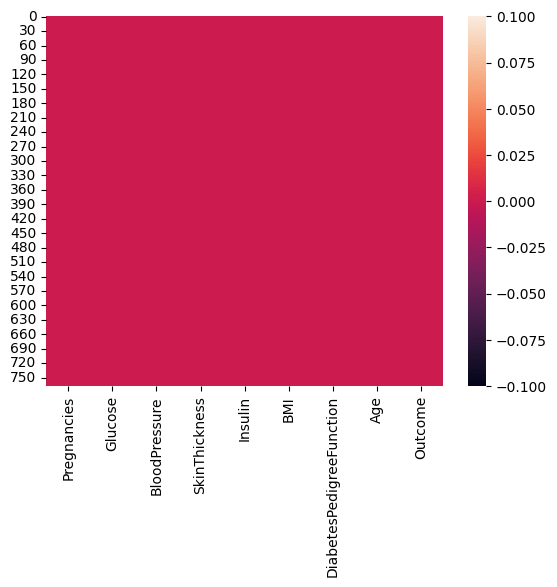

In [14]:
sns.heatmap(data.isnull())

In [15]:
correlation =data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

AttributeError: QuadMesh.set() got an unexpected keyword argument 'cnap'

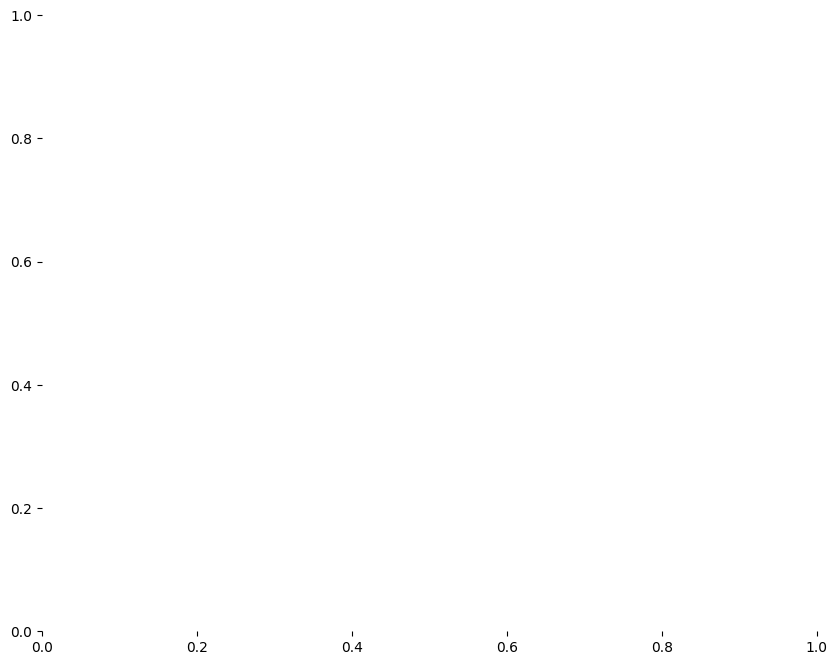

In [16]:
correlation_matrix =data.corr()
plt.figure(figsize =(10, 8))
sns.heatmap(correlation_matrix, annot=True, cnap='plasma', fmt = '.2f', linewidths=.5)
plt.title('Diabetic Correlation Matrix')
plt.show

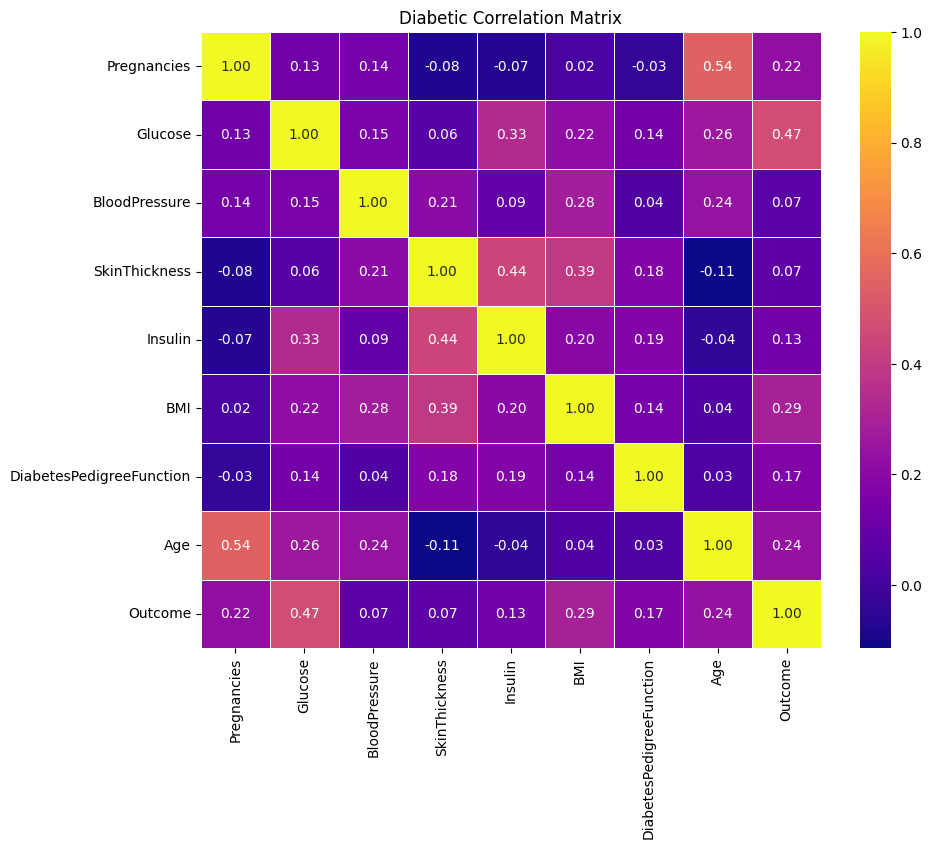

In [17]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt='.2f', linewidths=.5)
plt.title("Diabetic Correlation Matrix")
plt.show()

In [30]:
X = data.drop('Outcome',axis=1)
Y = data['Outcome']
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2, random_state=42)
print('Training Set')
print(pd.concat([X_train, Y_train], axis=1).head())

Training Set
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2       84              0              0        0   0.0   
618            9      112             82             24        0  28.2   
346            1      139             46             19       83  28.7   
294            0      161             50              0        0  21.9   
231            6      134             80             37      370  46.2   

     DiabetesPedigreeFunction  Age  Outcome  
60                      0.304   21        0  
618                     1.282   50        1  
346                     0.654   22        0  
294                     0.254   65        0  
231                     0.238   46        1  


In [53]:
#Import these functions
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)
#make prediction on the test set
Y_pred = model.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#CREATE AND FIT RandomForestClassifier model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, Y_train)
Y_pred_rf = random_forest_model.predict(X_test)

#EVALUATE THE MODEL
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
conf_matrix = confusion_matrix (Y_test, Y_pred_rf)
classification_rep_rf = classification_report(Y_test, Y_pred_rf)

#PRINT THE RESULTS
print('\nRandom Forest Classifier Model:')
print(f'Accuracy: {accuracy_rf * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep_rf)


Random Forest Classifier Model:
Accuracy: 72.08%
Confusion Matrix:
[[77 22]
 [21 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [57]:
from sklearn.linear_model import LogisticRegression

# Assuming 'X' and 'Y' are your features and target
# Assuming logistic_model is already trained and evaluated
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logistic = accuracy_score(Y_test, Y_pred_logistic)
conf_matrix_logistic = confusion_matrix(Y_test, Y_pred_logistic)
classification_rep_logistic = classification_report(Y_test, Y_pred_logistic)

# Print the results for Logistic Regression model
print('\nLogistic Regression Model:')
print(f'Accuracy: {accuracy_logistic * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix_logistic)
print('Classification Report:')
print(classification_rep_logistic)

# Continue with the Random Forest part

# Compare accuracies and determine the best model
if accuracy_logistic > accuracy_rf:
    best_model = logistic_model
    best_model_name = 'Logistic Regression'
else:
    best_model = random_forest_model
    best_model_name = 'Random Forest Classifier'

print(f"\nThe best model is: {best_model_name}")


Logistic Regression Model:
Accuracy: 74.68%
Confusion Matrix:
[[78 21]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


The best model is: Logistic Regression


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


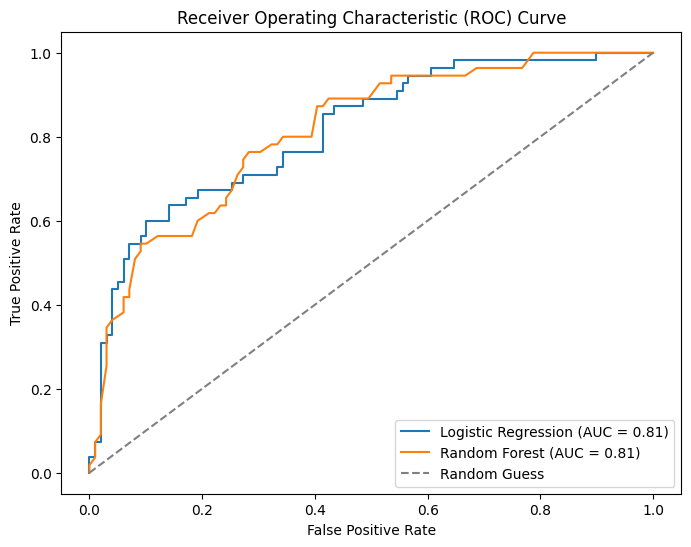

<Figure size 800x600 with 0 Axes>

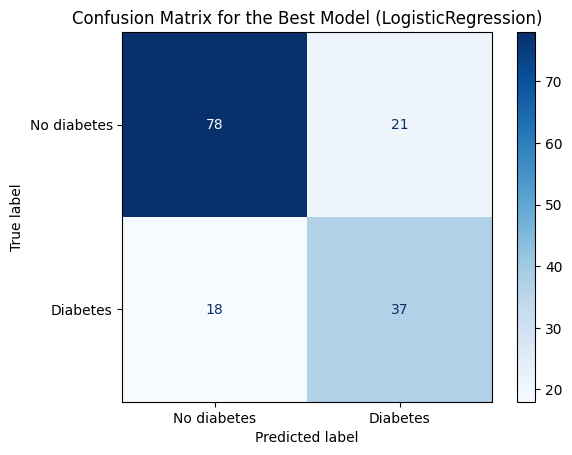

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming 'X' and 'Y' are your features and target
# Assuming logistic_model is already trained and evaluated
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, Y_train)

# Assuming random_forest_model is already trained and evaluated
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, Y_train)

# Calculate ROC curve and AUC for Logistic Regression
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]
fpr_logistic, tpr_logistic, _ = roc_curve(Y_test, y_prob_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# Calculate ROC curve and AUC for Random Forest
y_prob_rf = random_forest_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Plot confusion matrix for the best model
best_model = random_forest_model if roc_auc_rf > roc_auc_logistic else logistic_model
y_pred_best = best_model.predict(X_test)
cm_best = confusion_matrix(Y_test, y_pred_best)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=['No diabetes', 'Diabetes'])
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for the Best Model ({best_model.__class__.__name__})')
plt.show()

In [63]:
prediction = model.predict(X_test)
print(prediction)

[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [66]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model on the scaled data
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)

LogisticRegression()

In [67]:
model = LogisticRegression(max_iter=1000)  # You can adjust the number as needed
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [68]:
prediction = model.predict(X_test)
print(prediction)

[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [69]:
prediction = model.predict(X_test)

In [70]:
print(prediction)

[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [71]:
accuracy = accuracy_score(prediction, Y_test)

In [72]:
print(accuracy)

0.7467532467532467


In [74]:
class_report = classification_report (Y_test, prediction)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



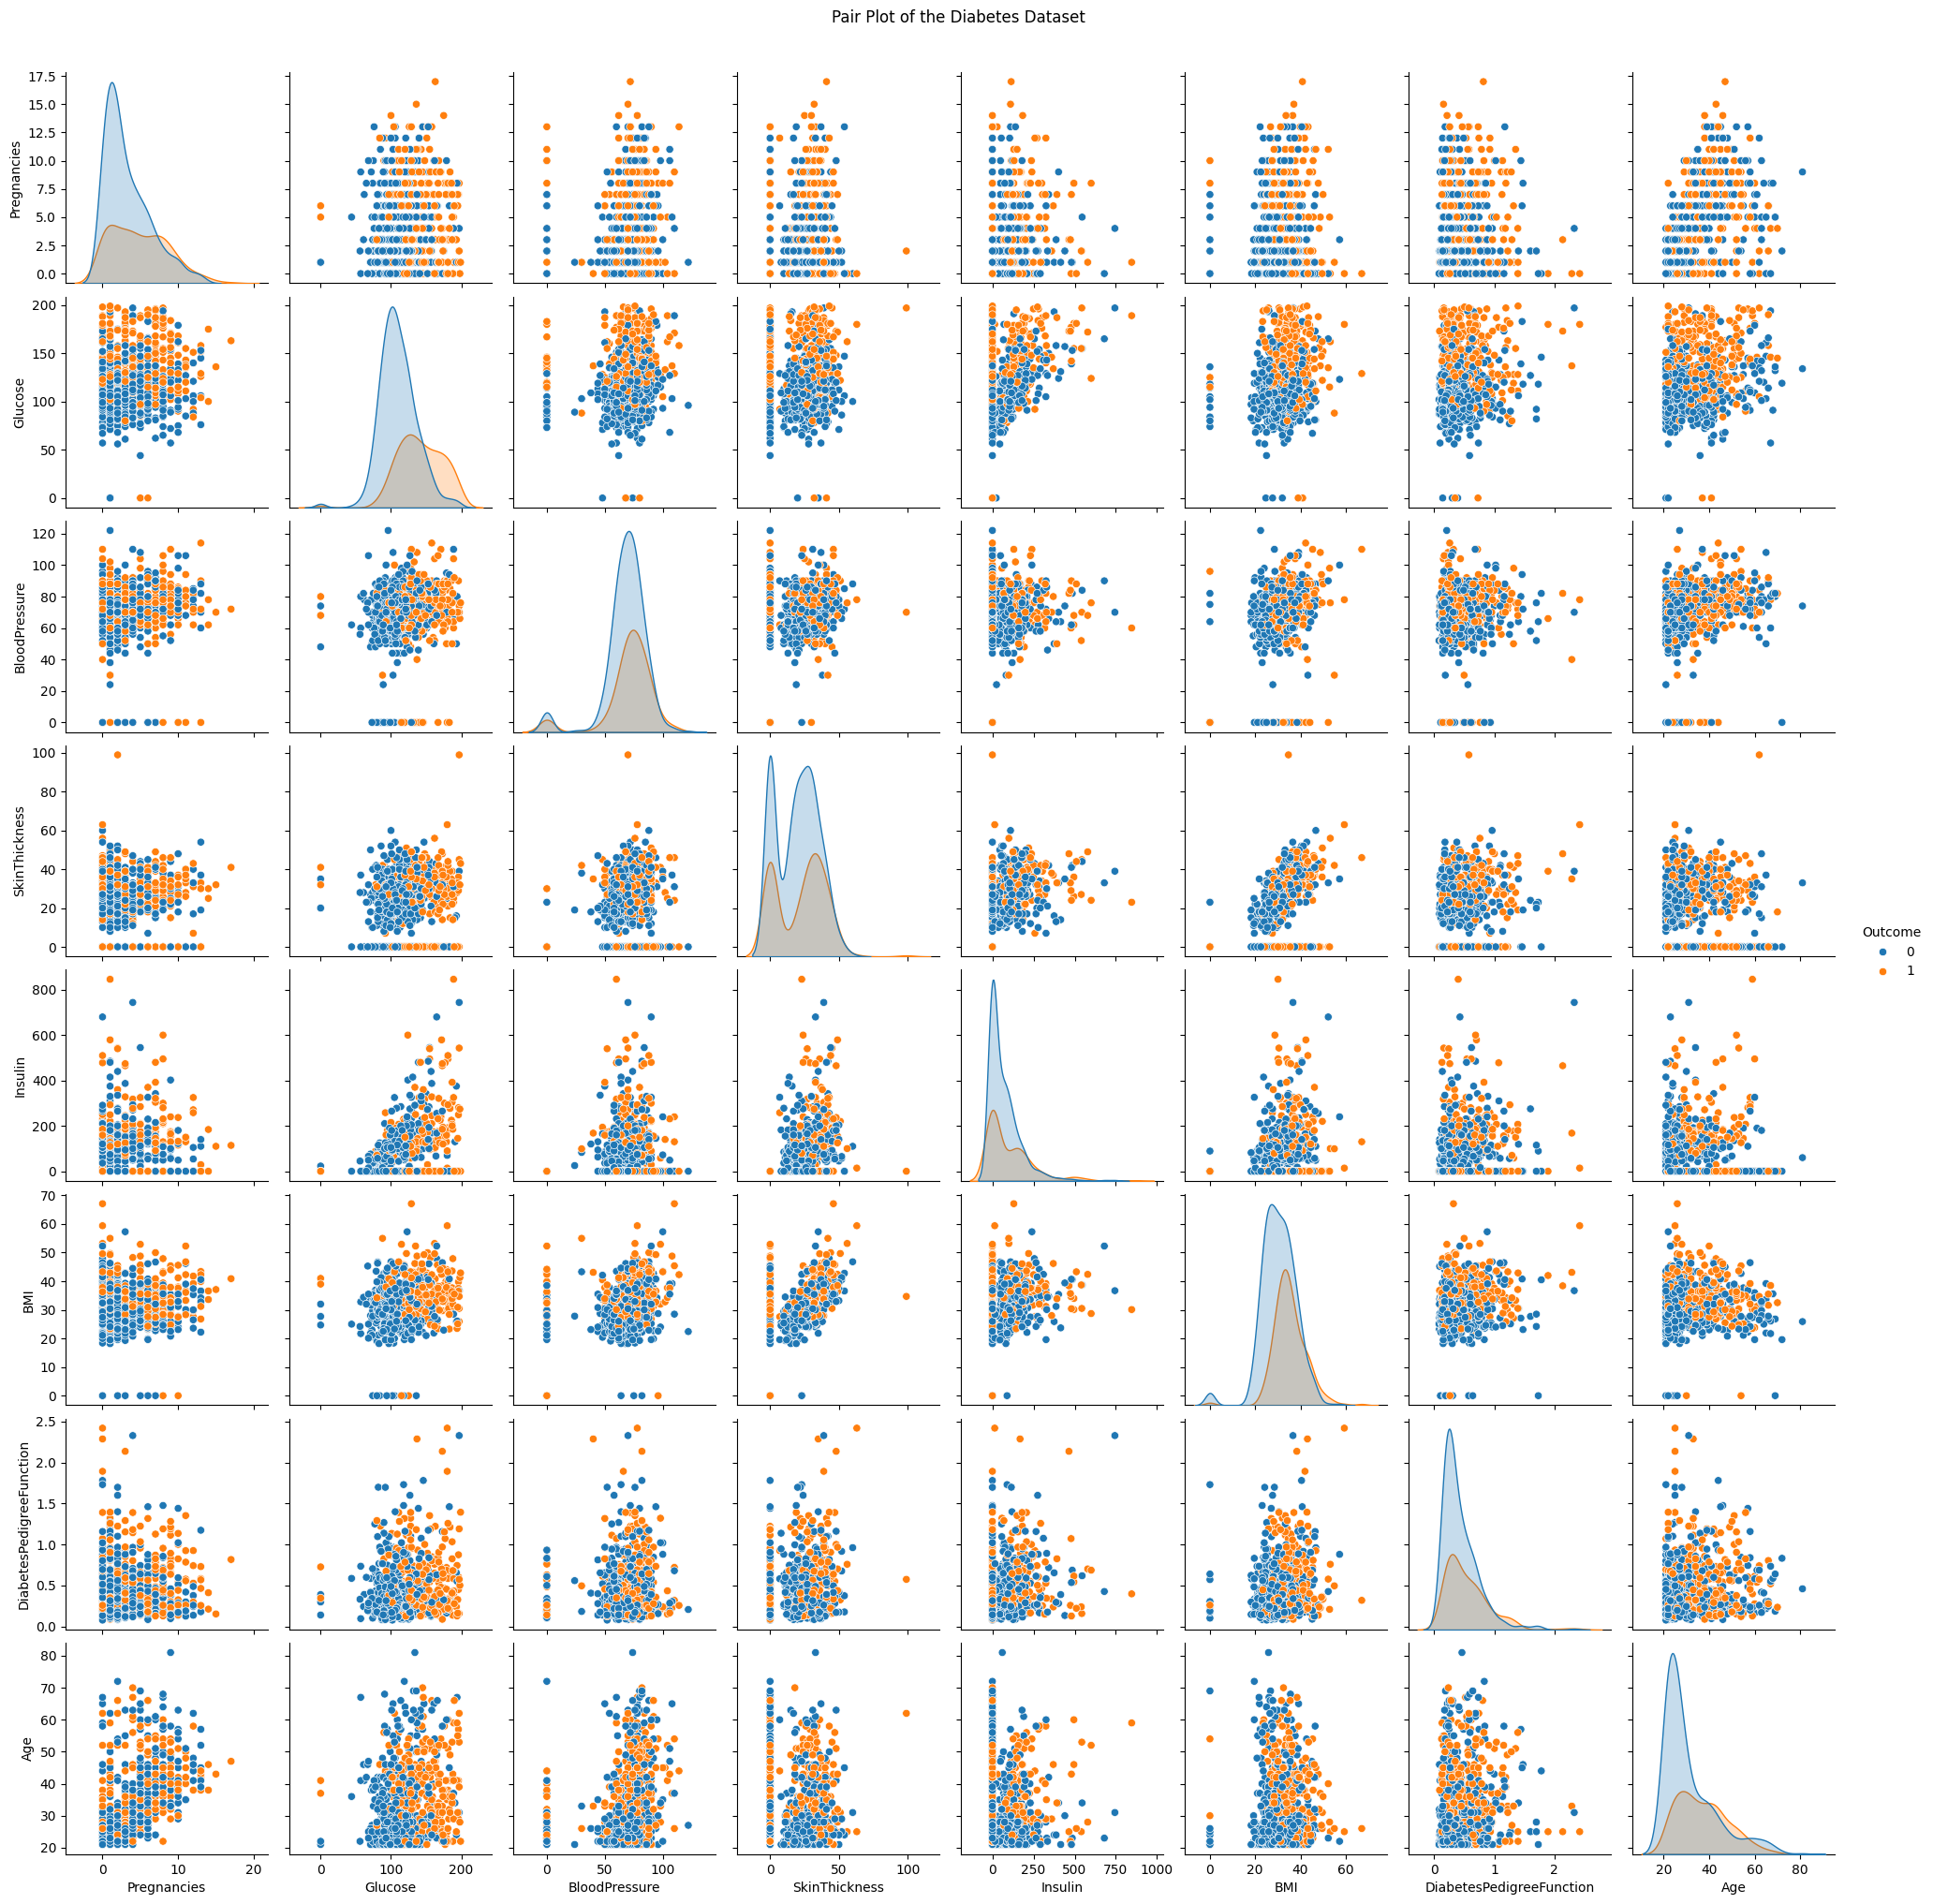

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
sns.pairplot(data, hue='Outcome', diag_kind="kde")
plt.suptitle('Pair Plot of the Diabetes Dataset', y=1.02)
plt.show()

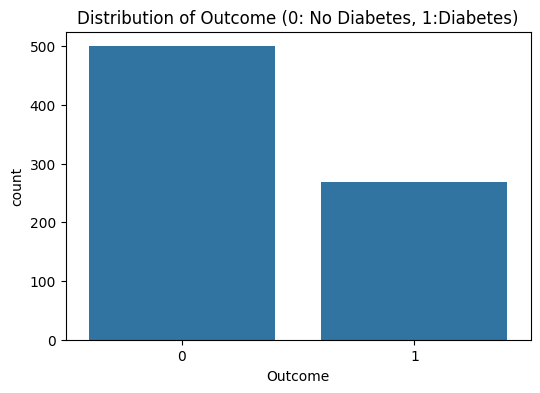

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Outcome (0: No Diabetes, 1:Diabetes)')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7380\214742993.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=data, palette=custom_palette)
C:\Users\HP\AppData\Local\Temp\ipykernel_7380\214742993.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=data, palette=custom_palette)
C:\Users\HP\AppData\Local\Temp\ipykernel_7380\214742993.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=data, palette=custom_palette)
C:\Users\HP\AppData\Local\Temp\ipykernel_7380\

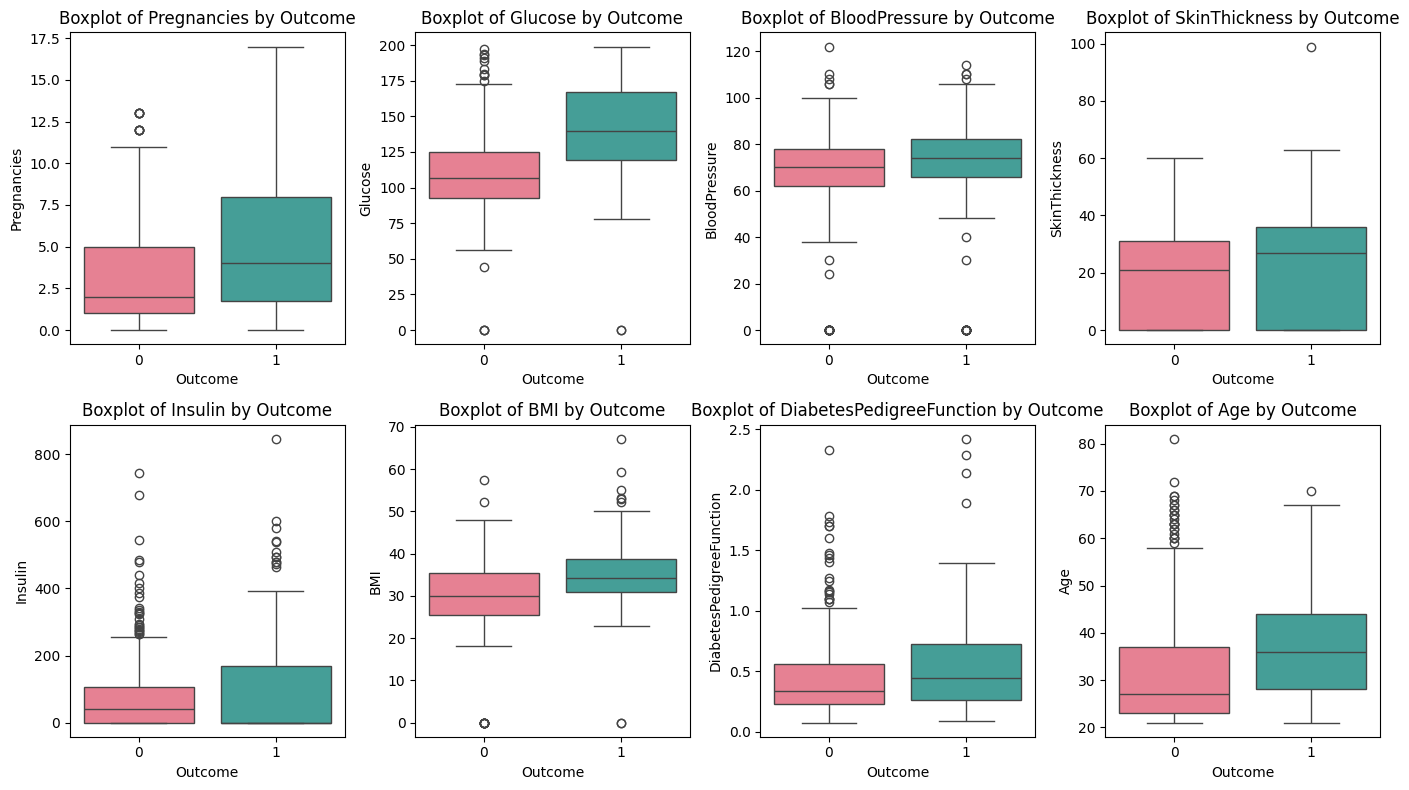

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette for the boxplots
custom_palette = sns.color_palette("husl", 2)  # You can choose a different color palette

plt.figure(figsize=(14, 8))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='Outcome', y=column, data=data, palette=custom_palette)
    plt.title(f'Boxplot of {column} by Outcome')
plt.tight_layout()
plt.show()

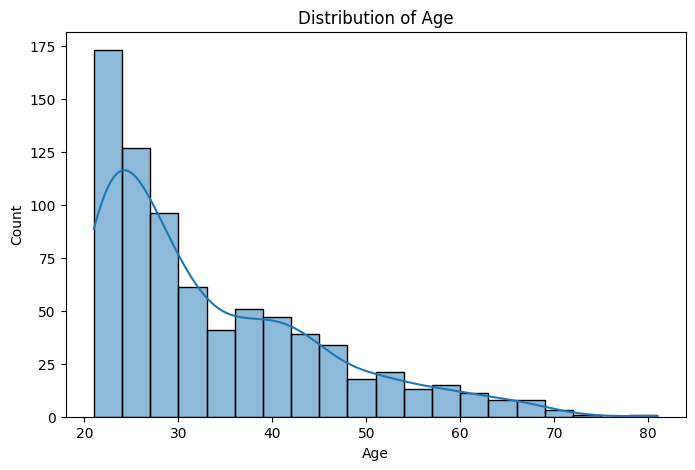

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

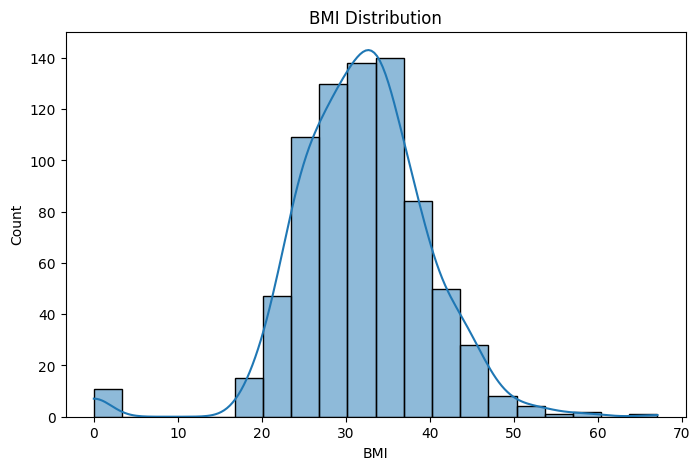

In [86]:
plt.figure(figsize=(8, 5))
sns.histplot(data['BMI'], bins=20, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.show()

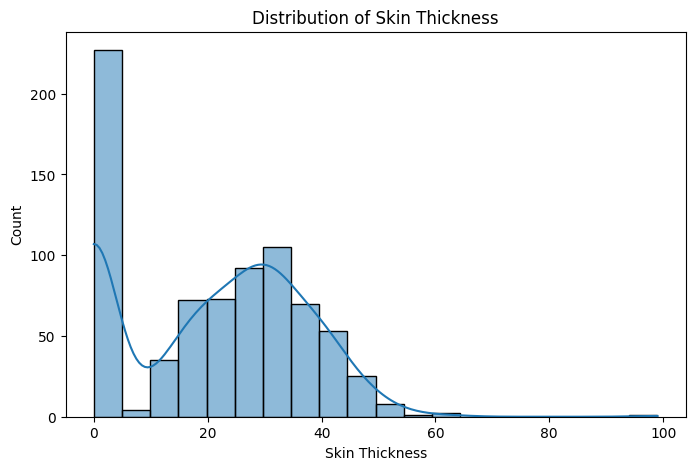

In [89]:
plt.figure(figsize=(8, 5))
sns.histplot(data['SkinThickness'], bins=20, kde=True)
plt.title('Distribution of Skin Thickness')
plt.xlabel('Skin Thickness')
plt.show()

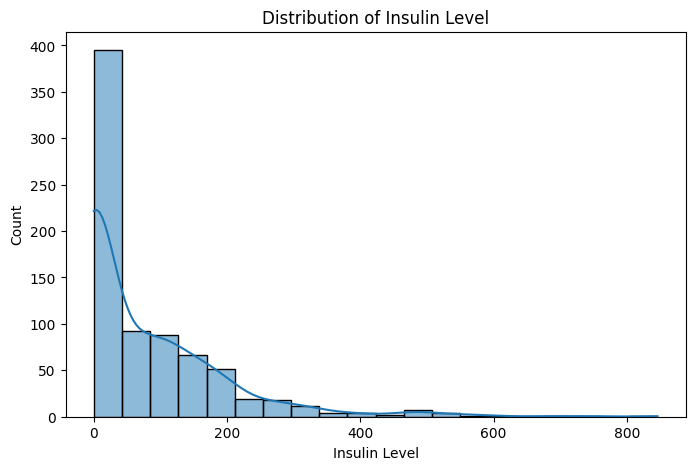

In [90]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Insulin'], bins=20, kde=True)
plt.title('Distribution of Insulin Level')
plt.xlabel('Insulin Level')
plt.show()

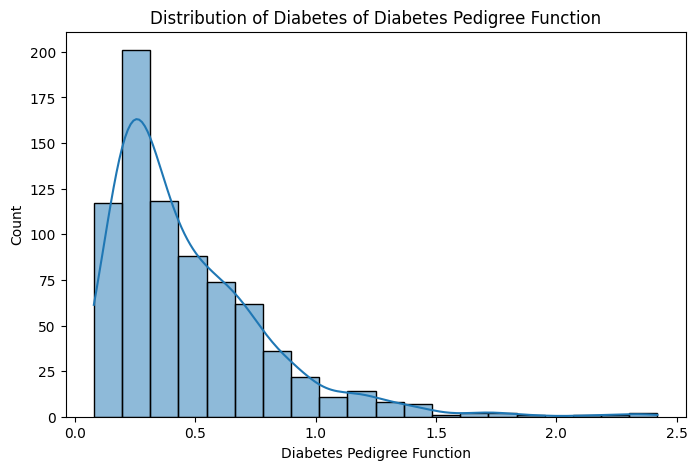

In [91]:
plt.figure(figsize=(8, 5))
sns.histplot(data['DiabetesPedigreeFunction'], bins=20, kde=True)
plt.title('Distribution of Diabetes of Diabetes Pedigree Function')
plt.xlabel('Diabetes Pedigree Function')
plt.show()

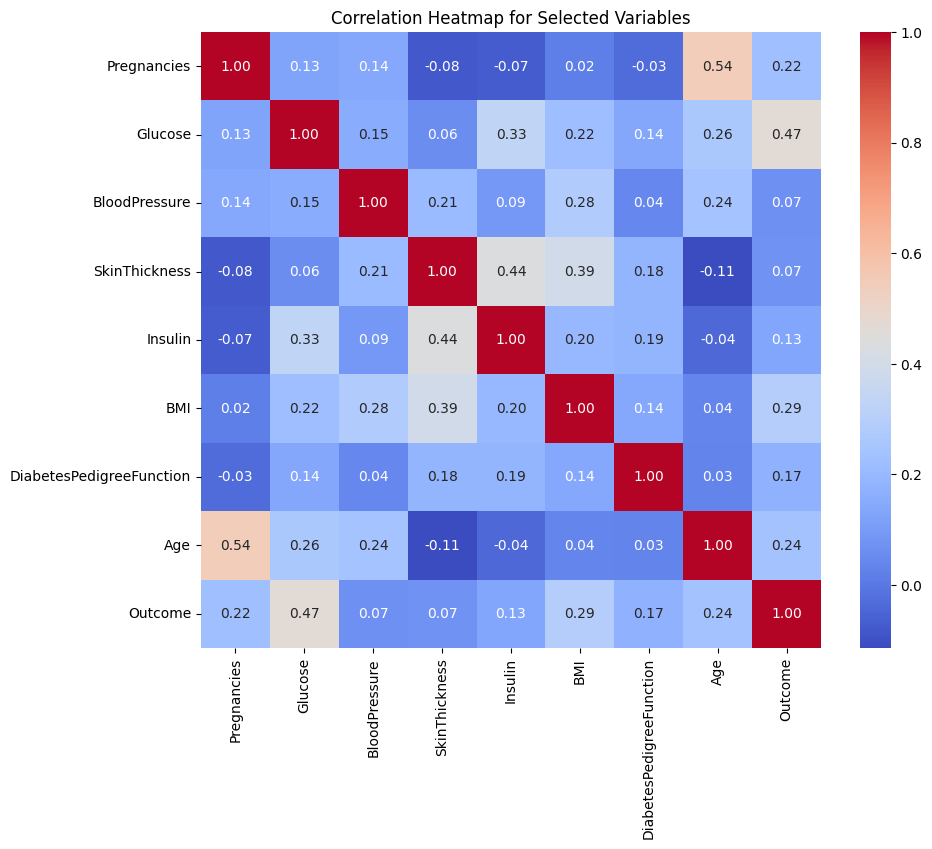

In [92]:
# Heatmap of Selected Variables
selected_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
selected_df = data[selected_vars]
plt.figure(figsize=(10, 8))
sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Selected Variables')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7380\465035775.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=data, palette=custom_palette)


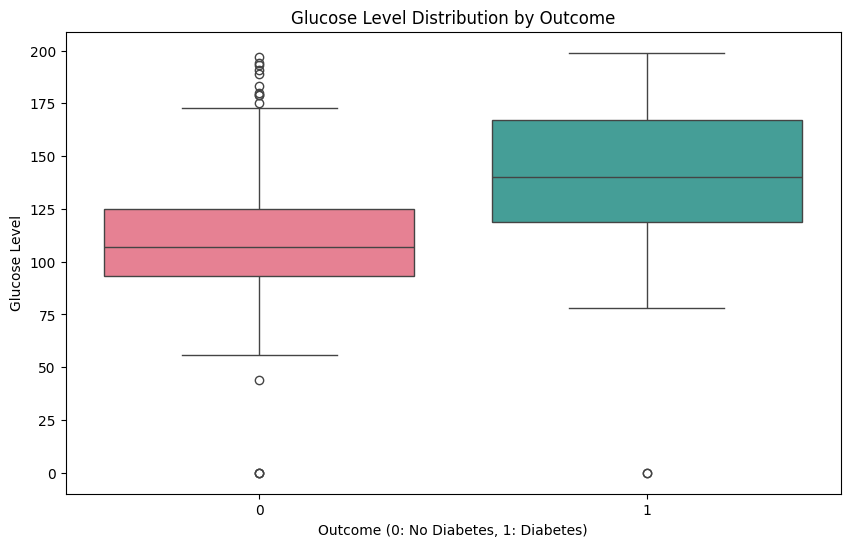

In [97]:
custom_palette = sns.color_palette("husl", 2)

# Glucose Level Distribution by Outcome with Custom Palette
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=data, palette=custom_palette)
plt.title('Glucose Level Distribution by Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Glucose Level')
plt.show()


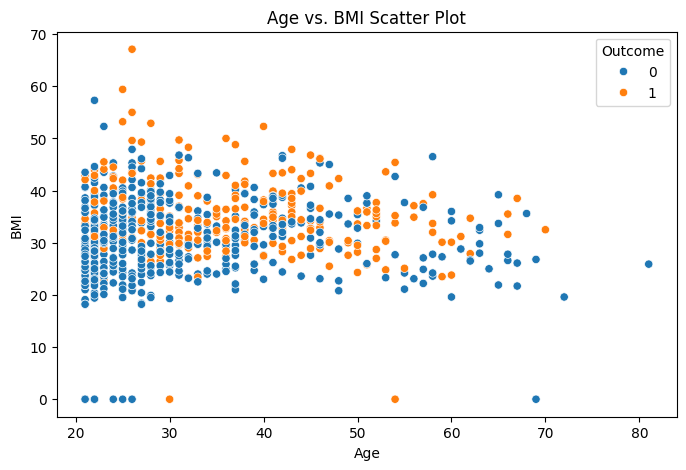

In [98]:
# Age vs. BMI Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='BMI', hue='Outcome', data=data)
plt.title('Age vs. BMI Scatter Plot')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()